# Сравнение моделей

<img src="https://raw.githubusercontent.com/tensorflow/tpu/master/models/official/efficientnet/g3doc/params.png" width=600 height=300 />

График точности моделей на датасете ImageNet


## Задание 1 (базовое)

Построить аналогичный график accuracy top 5 для различных моделей из Keras (можно на свой выбор) на примере датасета [imagenette](https://github.com/fastai/imagenette). Можете в целом использовать любой из тех, что есть в репозитории, но не забудьте указать какой. Валидация на части `valid` из датасета.


Более подробные графики с самыми последними результатами можно найти тут: [paperwithcode](https://paperswithcode.com/sota/image-classification-on-imagenet).

В том числе можно попытаться воспользоваться реализацией [FixEfficientNetV2](https://github.com/facebookresearch/FixRes), про которую мы на лекции не говорили, но она есть.

---

Еще ответы на вопросы (которые могут возникнуть):
- Q: Можно я напишу на Tensorflow/PyTorch чистом как моя душа желает?
- A: Да, можно, если я увижу в конце график и подробное описание что на нём.

...

- Q: Обязательно ли делать не базовую часть домашки?
- A: Не обязательно.

...

- Q: У меня проблема с реализацией, что делать?
- A: Пишите в слак в группу.

...


- Q: Можно ли вставлять в домашку смешные картиночки?
- A: Смешные картиночки это очень хорошо.

In [1]:
import numpy as np

from pathlib import Path

In [2]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet, efficientnet
from tensorflow.keras.applications import imagenet_utils

Если же вам угодно протестировать альтернативные модели, не стесняйтесь

In [3]:
# Набор вспомогательных методов

def get_model(model_name):
    if model_name == 'vgg16':
        model = vgg16.VGG16(weights='imagenet')
    elif model_name == 'inception_v3':
        model = inception_v3.InceptionV3(weights='imagenet')
    elif model_name == 'resnet50':
        model = resnet50.ResNet50(weights='imagenet')
    elif model_name == 'mobilenet':
        model = mobilenet.MobileNet(weights='imagenet')
    elif model_name == 'efficientnet':
        model = efficientnet.EfficientNetB6(weights='imagenet')
    return model

def get_helper_module(model_name):
    if model_name == 'vgg16':
        return vgg16
    elif model_name == 'inception_v3':
        return inception_v3
    elif model_name == 'resnet50':
        return resnet50
    elif model_name == 'mobilenet':
        return mobilenet
    elif model_name == 'efficientnet':
        return efficientnet

In [4]:
# https://drive.google.com/file/d/1Sr9A_YKuMDSGlS9hXVI8uIATEQuwGPFp/view?usp=sharing

! gdown --id 1Sr9A_YKuMDSGlS9hXVI8uIATEQuwGPFp

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Sr9A_YKuMDSGlS9hXVI8uIATEQuwGPFp
To: /content/imagenette2-320.zip
100% 347M/347M [00:03<00:00, 113MB/s]


In [5]:
! unzip /content/imagenette2-320.zip

Streaming output truncated to the last 5000 lines.
  inflating: imagenette2-320/train/n03445777/n03445777_8446.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8448.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8474.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8477.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8484.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8544.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8546.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8599.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8616.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8624.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8628.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_866.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8663.JPEG  
  inflating: imagenette2-320/train/n03445777/n03445777_8677.JPEG  
  inflating:

In [6]:
MODEL_NAME = 'efficientnet'
dir_path = Path('./imagenette2-320/val/')

model = get_model(MODEL_NAME)
helper_module = get_helper_module(MODEL_NAME)

174460376/174460376 [==============================] - 2s 0us/step


## Быстрый тест

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

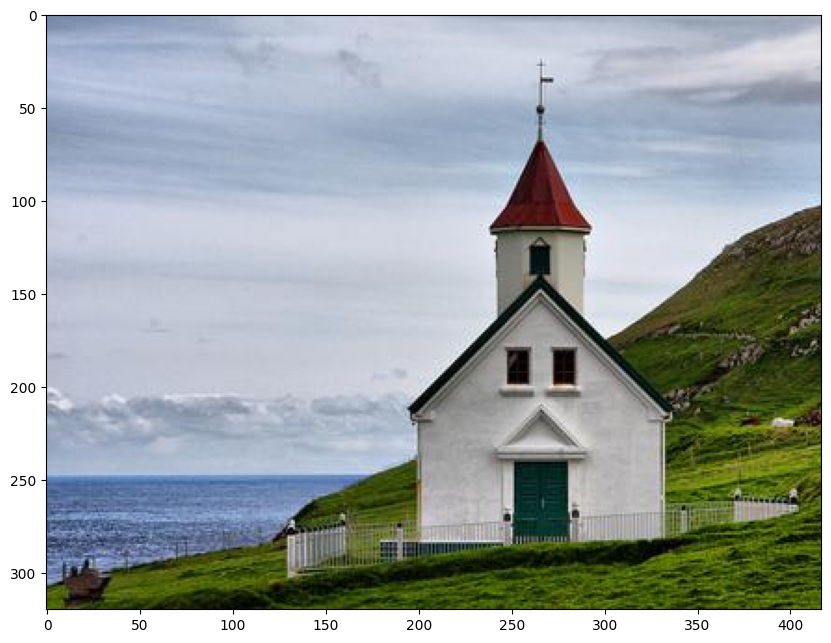

In [8]:
# test image
image = Image.open(dir_path / 'n03028079/ILSVRC2012_val_00004912.JPEG')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [9]:
# preprocess input
x = image.resize((model.input_shape[1], model.input_shape[1]))
x = helper_module.preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
helper_module.decode_predictions(y)

35363/35363 [==============================] - 0s 0us/step


[[('n03028079', 'church', 0.6445609),
  ('n02814860', 'beacon', 0.05685477),
  ('n02825657', 'bell_cote', 0.030696701),
  ('n03781244', 'monastery', 0.016403824),
  ('n02980441', 'castle', 0.004636704)]]

## Подгружаем датасет

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [191]:
valid_datagen = ImageDataGenerator(preprocessing_function=helper_module.preprocess_input)

valid_gen = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model.input_shape[1:-1],
    batch_size=32
)

batch_1st = next(valid_gen)

Found 3925 images belonging to 10 classes.


In [192]:
samples = batch_1st[0]

preds = model.predict(samples, steps=1, verbose=1)
preds_decoded = helper_module.decode_predictions(preds, top=5)

1/1 [==============================] - 99s 99s/step


In [193]:
preds_decoded[0]

[('n03445777', 'golf_ball', 0.8488903),
 ('n03942813', 'ping-pong_ball', 0.0017133858),
 ('n02799071', 'baseball', 0.00071732304),
 ('n12998815', 'agaric', 0.0006344257),
 ('n04409515', 'tennis_ball', 0.00062647404)]

In [194]:
get_codes = lambda item: [i[0] for i in item]
y_pred = np.array([get_codes(item) for item in preds_decoded])
y_pred[0]

array(['n03445777', 'n03942813', 'n02799071', 'n12998815', 'n04409515'],
      dtype='<U9')

In [195]:
# 0.5 балла
batch_1st_labels = batch_1st[1]
y_true = []
for l in batch_1st_labels:
    idx, = np.where(l == 1)
    label = list(valid_gen.class_indices.keys())[idx[0]]
    y_true.append(label)
y_true[0]

'n03445777'

## Top k accuracy (2 балла)

In [196]:
def top_k_accuracy(y_pred, y_true, k=5):
    top_k_pred = y_pred[:, :k]
    correct_pred_arr = np.array([1 if y_true[i] in pred else 0 for i, pred in enumerate(y_pred)])
    num_correct_top_k = np.sum(correct_pred_arr)
    right_ans = num_correct_top_k / len(y_true)
    return right_ans

In [197]:
top5_accuracy = top_k_accuracy(y_pred, y_true, k=5)


In [198]:
top1_accuracy = top_k_accuracy(y_pred, y_true, k=1)


In [201]:
top5_accuracy

1.0

## Ваше решение  

Нужно построить график точности моделей от числа ее параметров, подписать где какая модель (1.5 балла)

In [204]:
model_vgg16 = get_model('vgg16')
helper_module_vgg16 = get_helper_module('vgg16')

model_inception_v3 = get_model('inception_v3')
helper_module_inception_v3 = get_helper_module('inception_v3')

model_resnet50 = get_model('resnet50')
helper_module_resnet50 = get_helper_module('resnet50')

model_mobilenet = get_model('mobilenet')
helper_module_mobilenet = get_helper_module('mobilenet')

model_efficientnet = get_model('efficientnet')
helper_module_efficientnet = get_helper_module('efficientnet')

17225924/17225924 [==============================] - 0s 0us/step


In [209]:
valid_gen_vgg16 = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model_vgg16.input_shape[1:-1],
    batch_size=32
)
batch_1st_vgg16 = next(valid_gen_vgg16)

valid_gen_inception_v3 = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model_inception_v3.input_shape[1:-1],
    batch_size=32
)
batch_1st_inception_v3 = next(valid_gen_inception_v3)

valid_gen_resnet50 = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model_resnet50.input_shape[1:-1],
    batch_size=32
)
batch_1st_resnet50 = next(valid_gen_resnet50)

valid_gen_mobilenet = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model_mobilenet.input_shape[1:-1],
    batch_size=32
)
batch_1st_mobilenet = next(valid_gen_mobilenet)

valid_gen_efficientnet = valid_datagen.flow_from_directory(
    dir_path,
    shuffle=True, seed=42,
    target_size=model_efficientnet.input_shape[1:-1],
    batch_size=32
)
batch_1st_efficientnet = next(valid_gen_efficientnet)

Found 3925 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [211]:
samples_vgg16 = batch_1st_vgg16[0]
labels_vgg16 = batch_1st_vgg16[1]
y_true_vgg16 = []
for l in labels_vgg16:
    idx, = np.where(l == 1)
    label = list(valid_gen_vgg16.class_indices.keys())[idx[0]]
    y_true_vgg16.append(label)

samples_inception_v3 = batch_1st_inception_v3[0]
labels_inception_v3 = batch_1st_inception_v3[1]
y_true_inception_v3 = []
for l in labels_inception_v3:
    idx, = np.where(l == 1)
    label = list(valid_gen_inception_v3.class_indices.keys())[idx[0]]
    y_true_inception_v3.append(label)

samples_resnet50 = batch_1st_resnet50[0]
labels_resnet50 = batch_1st_resnet50[1]
y_true_resnet50 = []
for l in labels_resnet50:
    idx, = np.where(l == 1)
    label = list(valid_gen_resnet50.class_indices.keys())[idx[0]]
    y_true_resnet50.append(label)

samples_mobilenet = batch_1st_mobilenet[0]
labels_mobilenet = batch_1st_mobilenet[1]
y_true_mobilenet = []
for l in labels_mobilenet:
    idx, = np.where(l == 1)
    label = list(valid_gen_mobilenet.class_indices.keys())[idx[0]]
    y_true_mobilenet.append(label)

samples_efficientnet = batch_1st_efficientnet[0]
labels_efficientnet = batch_1st_efficientnet[1]
y_true_efficientnet = []
for l in labels_efficientnet:
    idx, = np.where(l == 1)
    label = list(valid_gen_efficientnet.class_indices.keys())[idx[0]]
    y_true_efficientnet.append(label)

In [212]:
preds_vgg16 = model_vgg16.predict(samples_vgg16, steps=1, verbose=1)
preds_decoded_vgg16 = helper_module_vgg16.decode_predictions(preds_vgg16, top=5)
y_pred_vgg16 = np.array([get_codes(item) for item in preds_decoded_vgg16])

preds_inception_v3 = model_inception_v3.predict(samples_inception_v3, steps=1, verbose=1)
preds_decoded_inception_v3 = helper_module_inception_v3.decode_predictions(preds_inception_v3, top=5)
y_pred_inception_v3 = np.array([get_codes(item) for item in preds_decoded_inception_v3])

preds_resnet50 = model_resnet50.predict(samples_resnet50, steps=1, verbose=1)
preds_decoded_resnet50 = helper_module_resnet50.decode_predictions(preds_resnet50, top=5)
y_pred_resnet50 = np.array([get_codes(item) for item in preds_decoded_resnet50])

preds_mobilenet = model_mobilenet.predict(samples_mobilenet, steps=1, verbose=1)
preds_decoded_mobilenet = helper_module_mobilenet.decode_predictions(preds_mobilenet, top=5)
y_pred_mobilenet = np.array([get_codes(item) for item in preds_decoded_mobilenet])

preds_efficientnet = model_efficientnet.predict(samples_efficientnet, steps=1, verbose=1)
preds_decoded_efficientnet = helper_module_efficientnet.decode_predictions(preds_efficientnet, top=5)
y_pred_efficientnet = np.array([get_codes(item) for item in preds_decoded_efficientnet])

1/1 [==============================] - 15s 15s/step


1/1 [==============================] - 12s 12s/step


1/1 [==============================] - 105s 105s/step


In [213]:
top5_accuracy_vgg16 = top_k_accuracy(y_pred_vgg16, y_true_vgg16, k=5)
top1_accuracy_vgg16 = top_k_accuracy(y_pred_vgg16, y_true_vgg16, k=1)

top5_accuracy_inception_v3 = top_k_accuracy(y_pred_inception_v3, y_true_inception_v3, k=5)
top1_accuracy_inception_v3 = top_k_accuracy(y_pred_inception_v3, y_true_inception_v3, k=1)

top5_accuracy_resnet50 = top_k_accuracy(y_pred_resnet50, y_true_resnet50, k=5)
top1_accuracy_resnet50 = top_k_accuracy(y_pred_resnet50, y_true_resnet50, k=1)

top5_accuracy_mobilenet = top_k_accuracy(y_pred_mobilenet, y_true_mobilenet, k=5)
top1_accuracy_mobilenet = top_k_accuracy(y_pred_mobilenet, y_true_mobilenet, k=1)

top5_accuracy_efficientnet = top_k_accuracy(y_pred_efficientnet, y_true_efficientnet, k=5)
top1_accuracy_efficientnet = top_k_accuracy(y_pred_efficientnet, y_true_efficientnet, k=1)

In [242]:
top5_acc_list = [top5_accuracy_vgg16 * 100, top5_accuracy_inception_v3 * 100, top5_accuracy_resnet50 * 100, top5_accuracy_mobilenet * 100, top5_accuracy_efficientnet * 100]
top1_acc_list = [top1_accuracy_vgg16 * 100, top1_accuracy_inception_v3 * 100, top1_accuracy_resnet50 * 100, top1_accuracy_mobilenet * 100, top1_accuracy_efficientnet * 100]

In [243]:
x = [138357544 / 1000000, 23851784 / 1000000, 25636712 / 1000000, 4253864 / 1000000, 43265143 / 1000000]
y_top5 = top5_acc_list
y_top1 = top1_acc_list

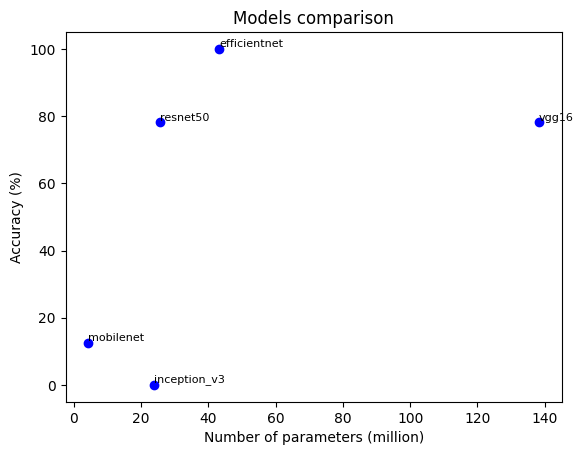

In [255]:
points = ['vgg16', 'inception_v3', 'resnet50', 'mobilenet', 'efficientnet']

plt.scatter(x, y_top5, label='Random Data', color='blue', marker='o')

plt.title('Models comparison')
plt.xlabel('Number of parameters (million)')
plt.ylabel('Accuracy (%)')

for i in range(len(x)):
    plt.text(x[i], y_top5[i], points[i], fontsize=8, ha='left', va='bottom')